Download packages

In [68]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
import os
import pandas as pd
import random
import matplotlib.pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import warnings
from sklego.meta import OrdinalClassifier
from sklearn.inspection import DecisionBoundaryDisplay
import scipy
from sklearn.metrics import balanced_accuracy_score

In [69]:
random.seed(8)

Create new feature names to take the mean and std across epochs pr person

In [70]:
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]
print(mean_list)

['Delta_mean', 'Delta_N_mean', 'Theta_mean', 'Theta_N_mean', 'Alpha_mean', 'Alpha_N_mean', 'Beta_mean', 'Beta_N_mean', 'Gamma_mean', 'Gamma_N_mean', 'SE_mean', 'MSF_mean', 'Sef90_mean', 'Sef95_mean', 'PE_mean', 'wSMI_mean', 'Kolmogorov_mean', 'MeanRR_mean', 'StdRR_mean', 'MeanHR_mean', 'StdHR_mean', 'MinHR_mean', 'MaxHR_mean']


Concatenate data

In [71]:
path ='CSV_features_NEW/'
folder = os.fsencode(path)
m_list = ['Delta', 'Delta_N', 'Theta', 'Theta_N', 'Alpha', 'Alpha_N', 'Beta', 'Beta_N', 'Gamma', 'Gamma_N', 'SE', 'MSF', 'Sef90', 'Sef95', 'PE', 'wSMI', 'Kolmogorov', 'MeanRR', 'StdRR', 'MeanHR', 'StdHR', 'MinHR', 'MaxHR', 'freq_slope_mean','freq_slope_std'] 
renamed_markers_list = ['No.', 'Event', 'Delta', 'Delta (normalized)', 'Theta', 'Theta (normalized)', 'Alpha', 'Alpha (normalized)', 'Beta', 'Beta (normalized)', 'Gamma', 'Gamma (normalized)', 'Spectral entropy', 'Median Spectral Frequency', 'Spectral edge 90', 'Spectral edge 95', 'Permutation entropy', 'Weigthed Symbolic Mutual Information', 'Kolmogorov complexity', 'Mean values of RR-intervals', 'Std of RR-intervals', 'Mean of heart rates (HR)', 'Std of heart rates (HR)', 'Minimum values of heart rate (HR)', 'Maximum values of heart rate (HR)', 'Mean of slope of aperiodic curve','Std of slope of aperiodic curve'] 
mean_list = [i + '_mean' for i in m_list]
std_list = [i + '_std' for i in m_list]


patient_numbers = []
r_data = []
m_data = []
f_data = []

all_data = []


for file in os.listdir(folder):
    filename = os.fsdecode(file)
    patient_numbers.append(filename[0:3])
    fname = path + filename
    data = pd.read_csv(fname)
    data.columns = renamed_markers_list
    all_data.append(data)


In [72]:
# Renaming unfamiliar event
for i in range(len(all_data)):
    events = all_data[i]['Event']
    for j in range(len(events)):
        if events[j] == 'M':
            events[j] = 'UV'

C:\Users\CHVI0030\AppData\Local\Temp\ipykernel_1344\3995099116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events[j] = 'UV'
C:\Users\CHVI0030\AppData\Local\Temp\ipykernel_1344\3995099116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events[j] = 'UV'
C:\Users\CHVI0030\AppData\Local\Temp\ipykernel_1344\3995099116.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events[j] = 'UV'
C:\Users\CHVI0030\AppData\Local\Temp\ipyker

Ignore irrelevant warnings

In [73]:
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [74]:
all_data_as_df = pd.concat(all_data)

In [75]:
#check if the normalization is correct for psd
#data = all_data[0]
#print(data.loc[:,['Alpha_N', 'Delta_N', 'Theta_N', 'Beta_N']].sum(axis=1))
sums_list = []
for i, data in enumerate(all_data):
    sums = data.loc[:,['Alpha (normalized)', 'Delta (normalized)', 'Theta (normalized)', 'Beta (normalized)']].sum(axis=1)
    #if i == 0:
    #    print(sums)
    sums_list.append(np.mean(sums))
#print(sorted(sums_list))

In [76]:
A = set()
B = set()
C = set()
D = set()
numbers = []
for i, data in enumerate(all_data):
    
    if np.min(data['Delta']) < -300:
        A.add(patient_numbers[i])
        numbers.append(i)
    if np.min(data['Theta']) < -300:
        B.add(patient_numbers[i])
    if np.min(data['Alpha']) < -300:
        C.add(patient_numbers[i])
    if np.min(data['Beta']) < -300:
        D.add(patient_numbers[i])

In [77]:
A1 = set()
B1 = set()
C1 = set()
D1 = set()
E1 = set()
numbers = []
for i, data in enumerate(all_data):
    '', '', '', 'Weigthed Symbolic Mutual Information'
    if np.min(data['Median Spectral Frequency']) == 0.0:
        A1.add(patient_numbers[i])
        numbers.append(i)
    if np.min(data['Spectral edge 90']) == 0.0:
        B1.add(patient_numbers[i])
    if np.min(data['Spectral edge 95']) == 0.0:
        C1.add(patient_numbers[i])
    if np.min(data['Permutation entropy']) == 0.0:
        D1.add(patient_numbers[i])
    if np.min(data['Weigthed Symbolic Mutual Information']) == 0.0:
        E1.add(patient_numbers[i])

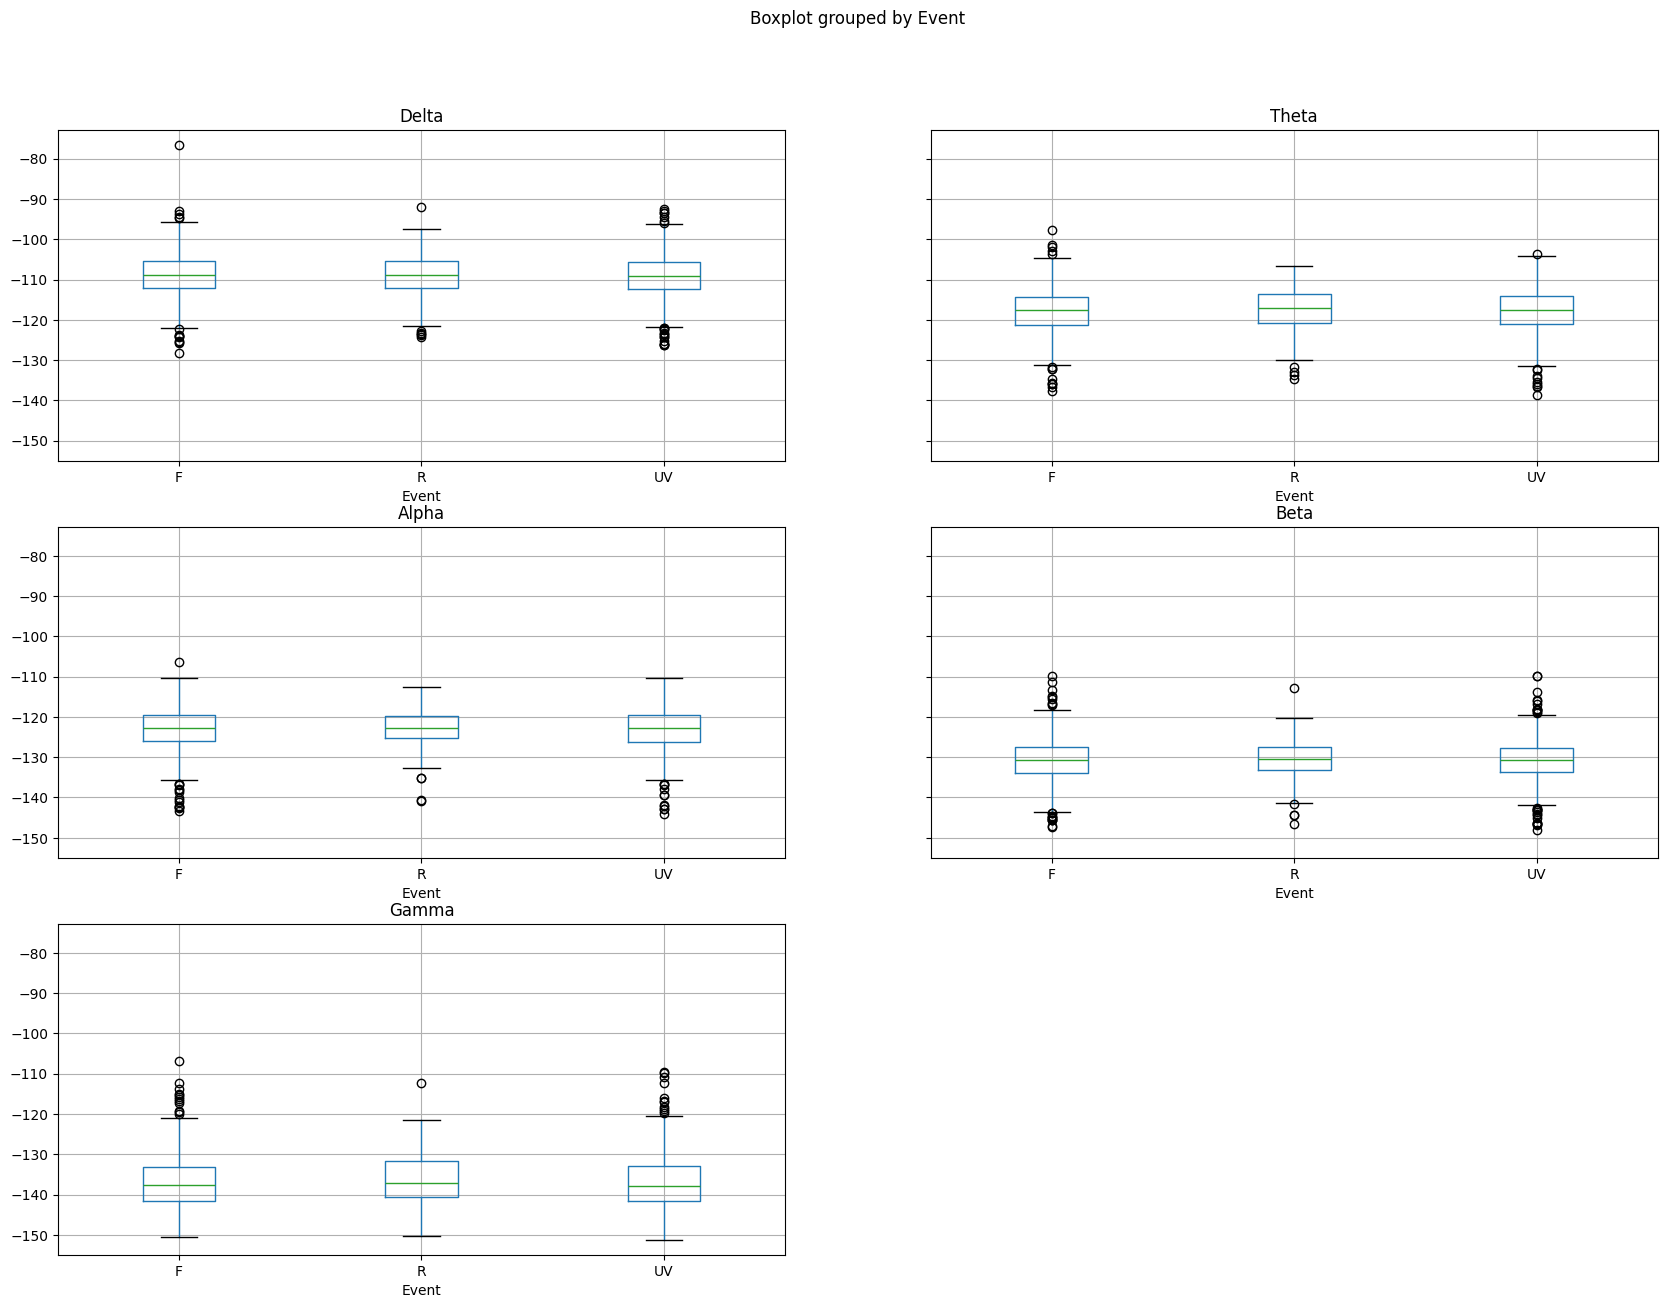

In [78]:
all_data_as_df.boxplot(column=['Delta','Theta', 'Alpha','Beta', 'Gamma'], by='Event', figsize=(20,15),sharex=False)
plt.show()

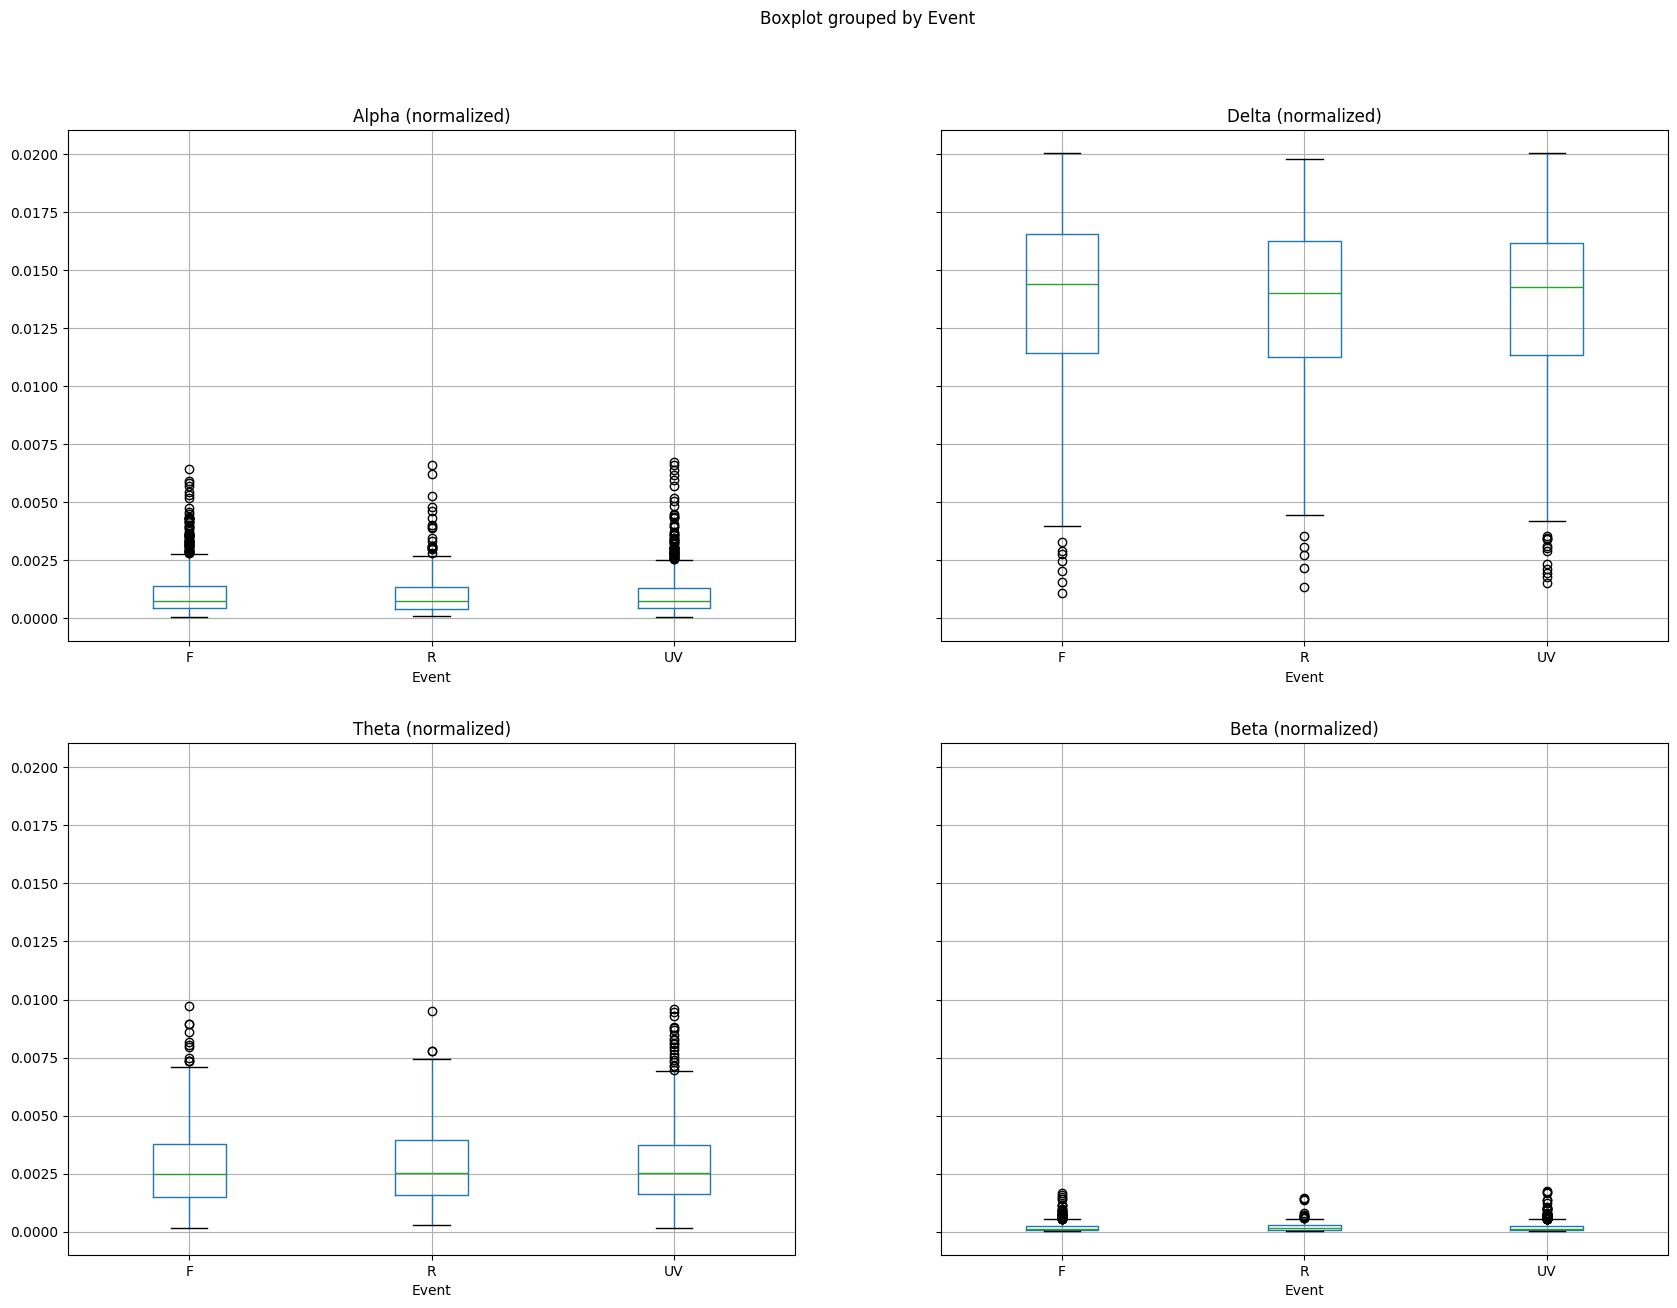

In [79]:
all_data_as_df.boxplot(column=['Alpha (normalized)', 'Delta (normalized)', 'Theta (normalized)', 'Beta (normalized)'], by='Event', figsize=(20,15), sharex=False)
plt.show()

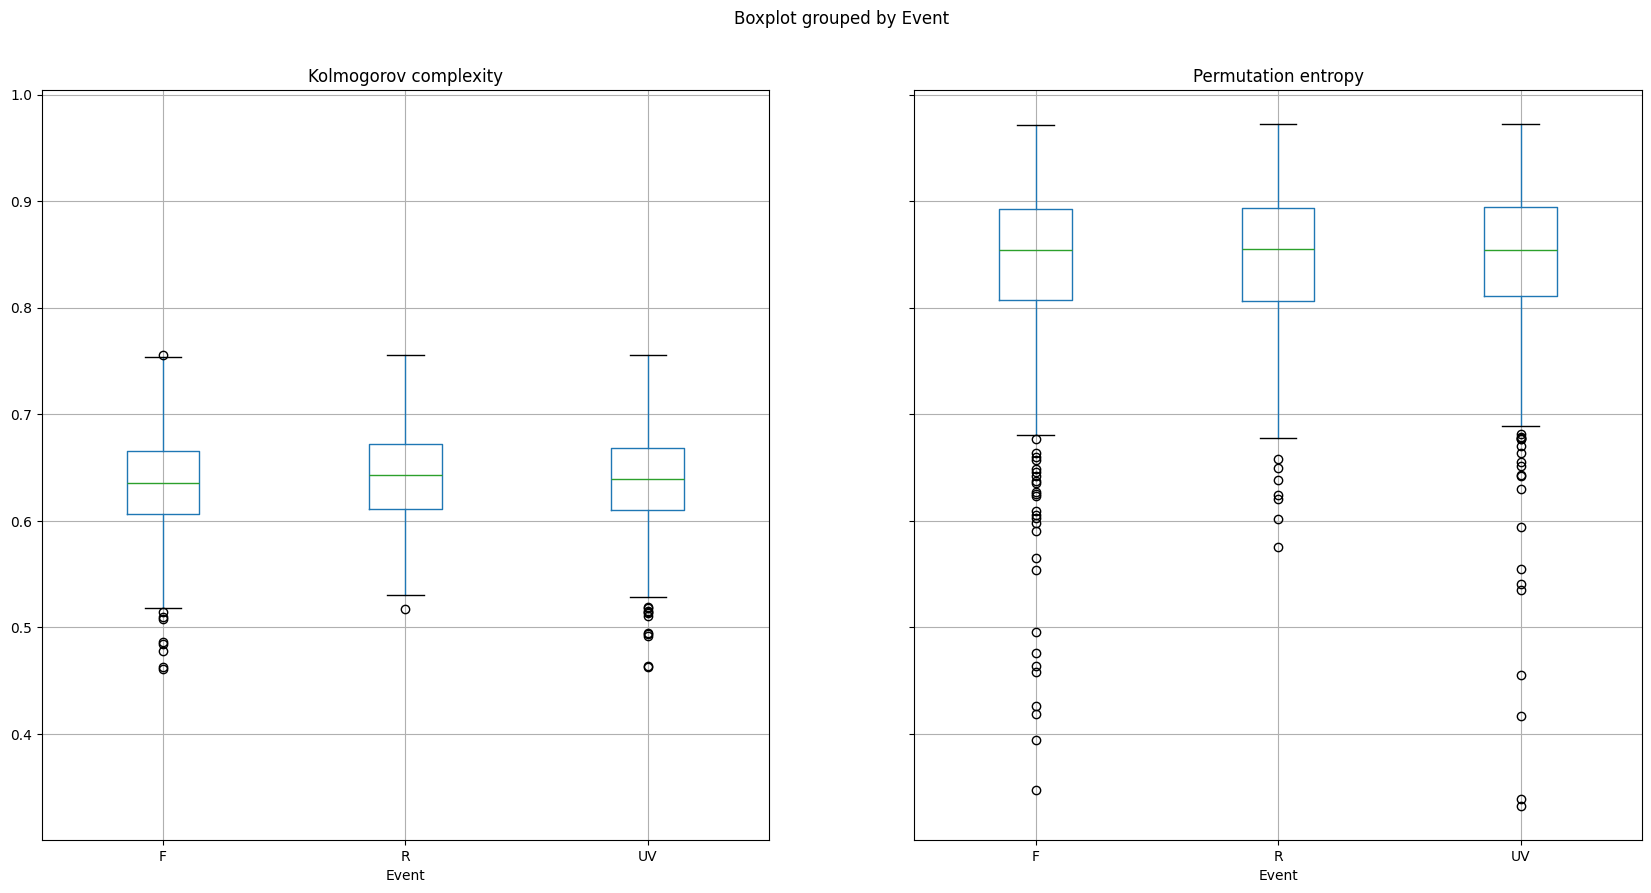

In [80]:
all_data_as_df.boxplot(column=['Kolmogorov complexity', 'Permutation entropy'], by='Event', figsize=(20,10), sharex=False)
plt.show()

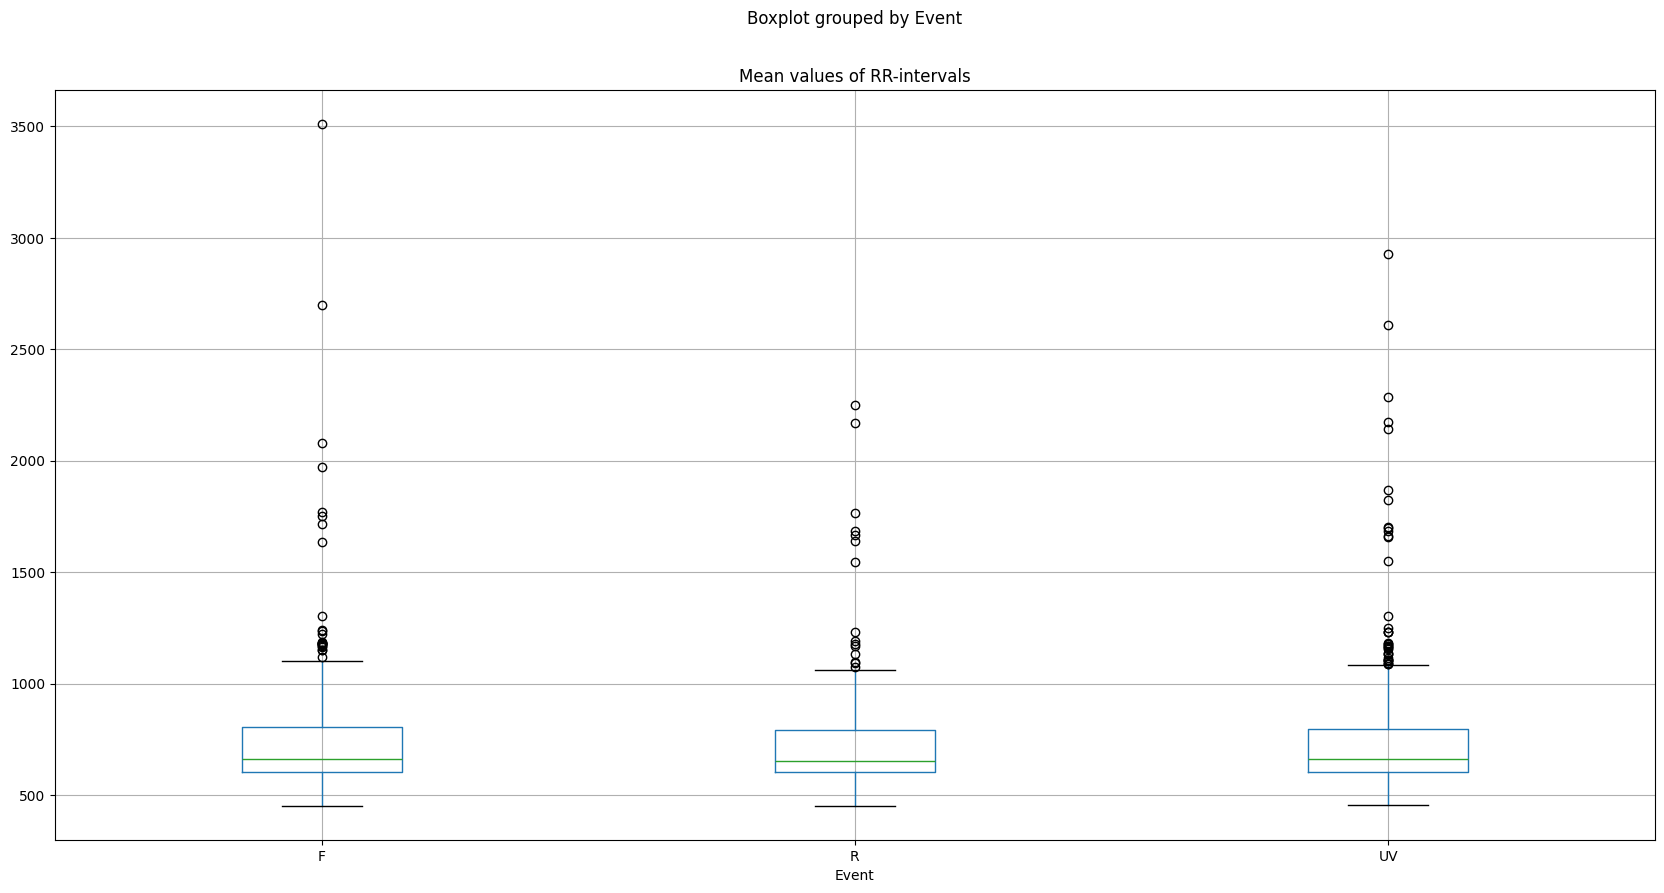

In [81]:
all_data_as_df.boxplot(column=['Mean values of RR-intervals'], by='Event', figsize=(20,10))
plt.show()

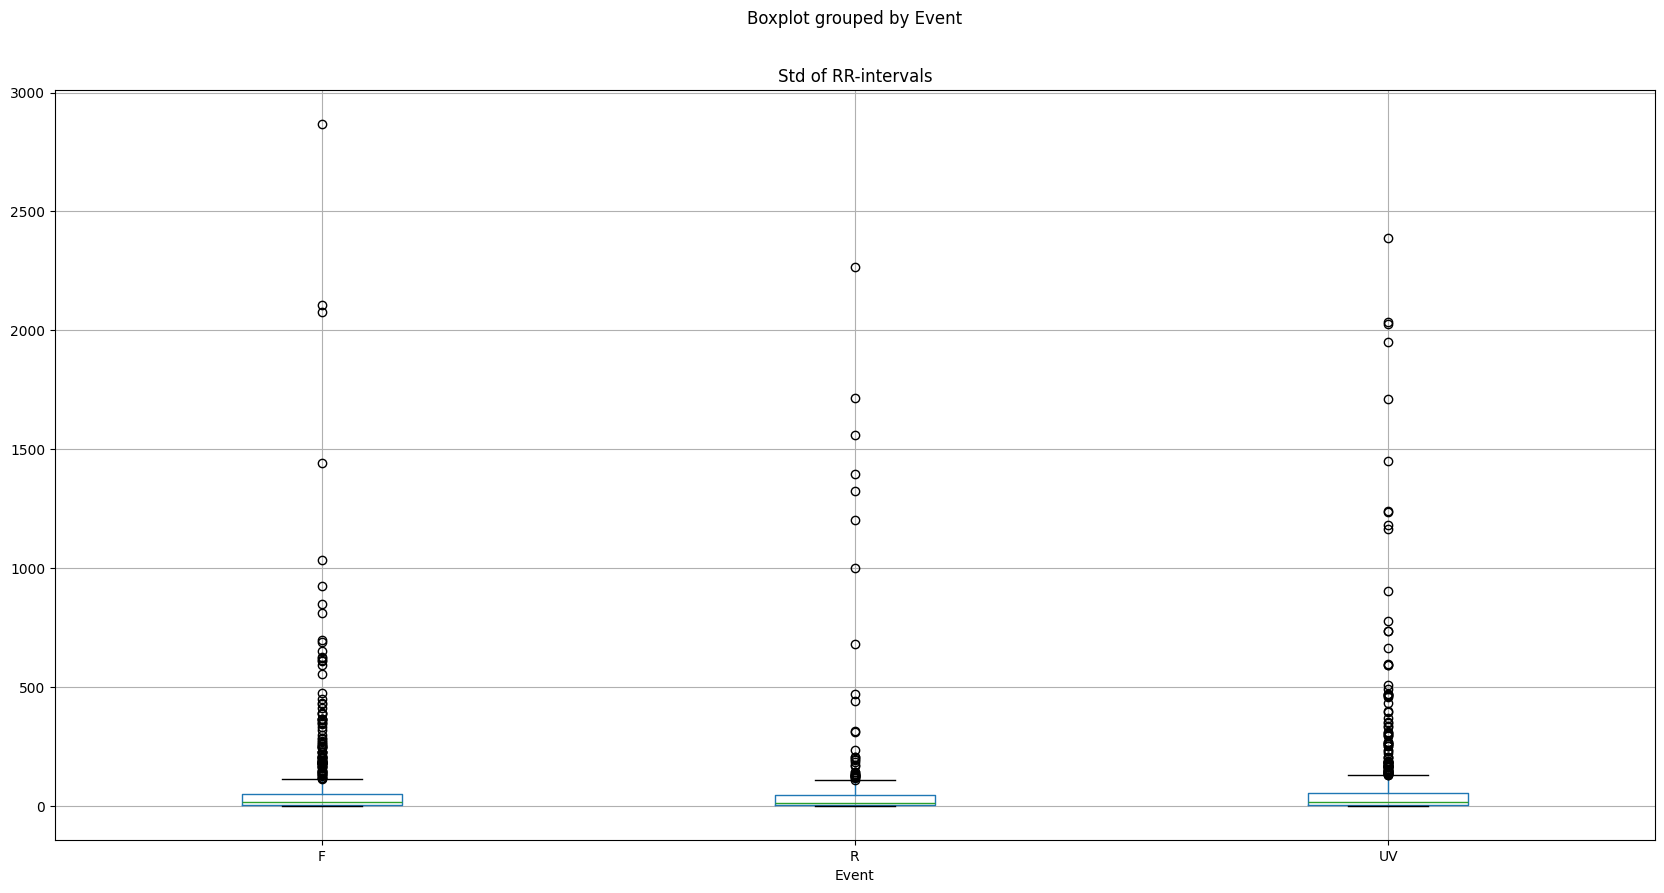

In [82]:
all_data_as_df.boxplot(column=['Std of RR-intervals'], by='Event', figsize=(20,10))
plt.show()

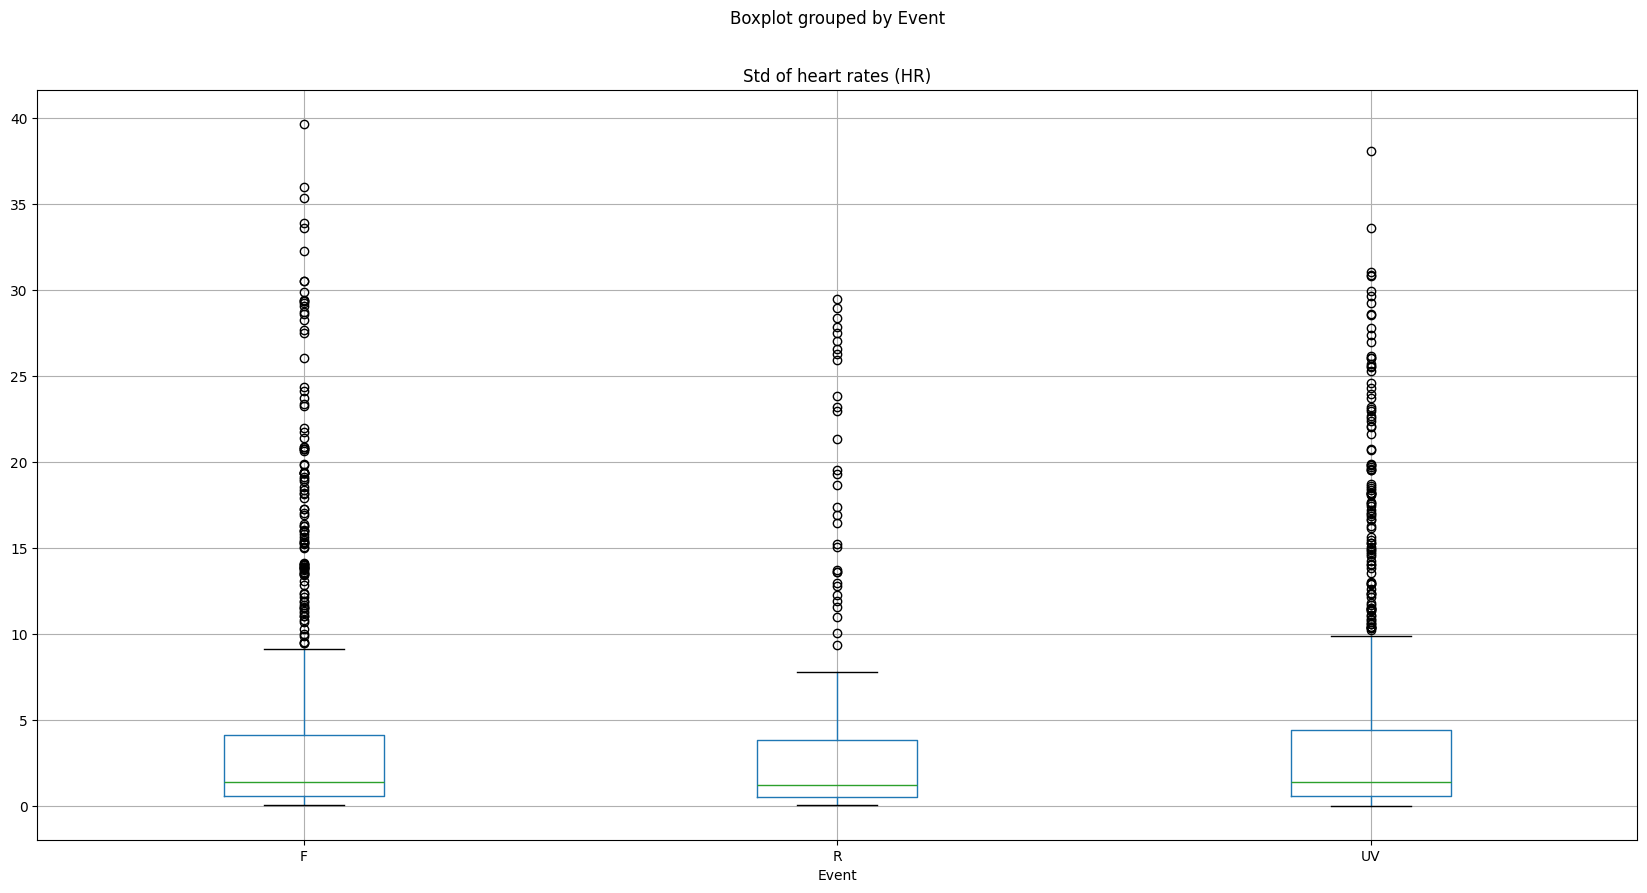

In [83]:
all_data_as_df.boxplot(column=['Std of heart rates (HR)'], by='Event', figsize=(20,10))
plt.show()

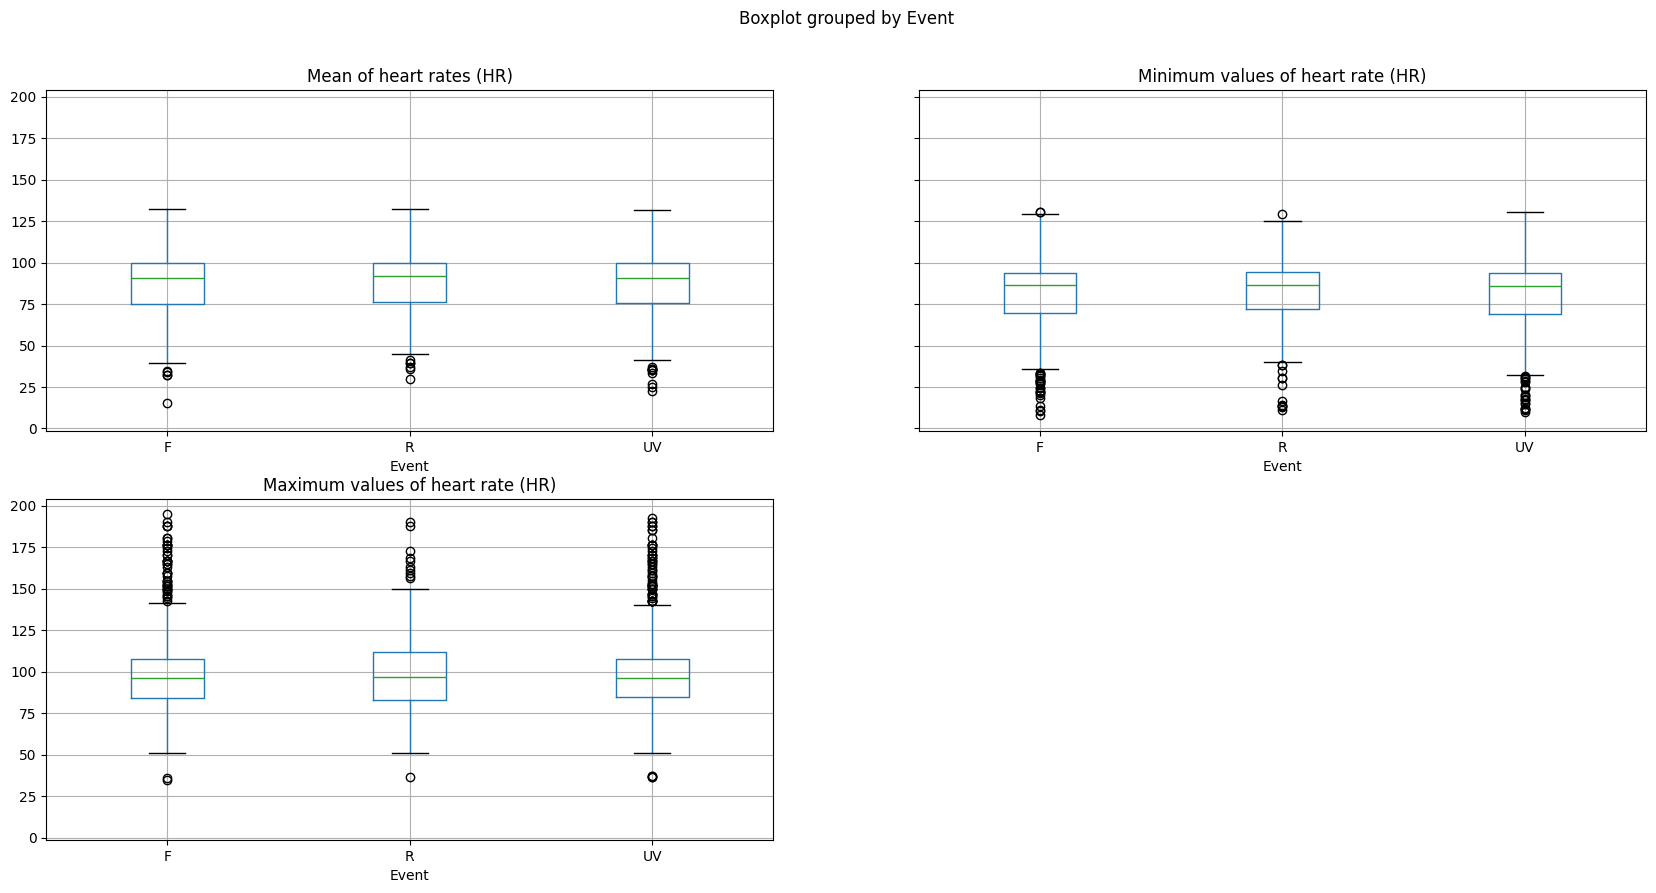

In [84]:
fig, ax = all_data_as_df.boxplot(column=['Mean of heart rates (HR)', 'Minimum values of heart rate (HR)', 'Maximum values of heart rate (HR)'], by='Event', figsize=(20,10), sharex=False)
plt.show()

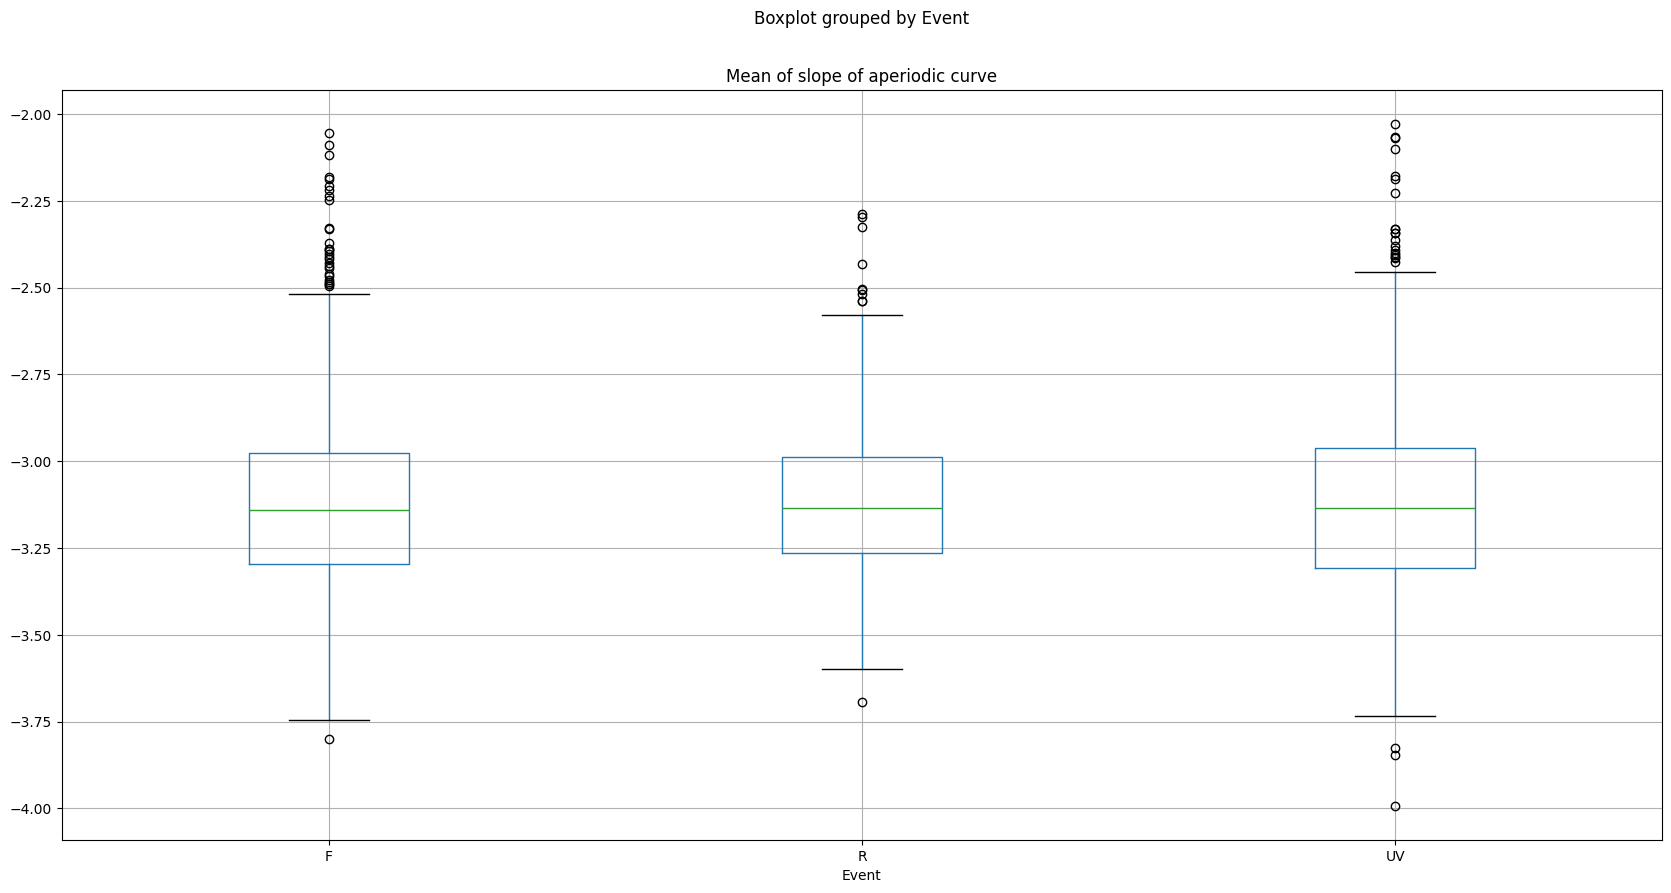

In [85]:
all_data_as_df.boxplot(column=['Mean of slope of aperiodic curve'], by='Event', figsize=(20,10))
plt.show()


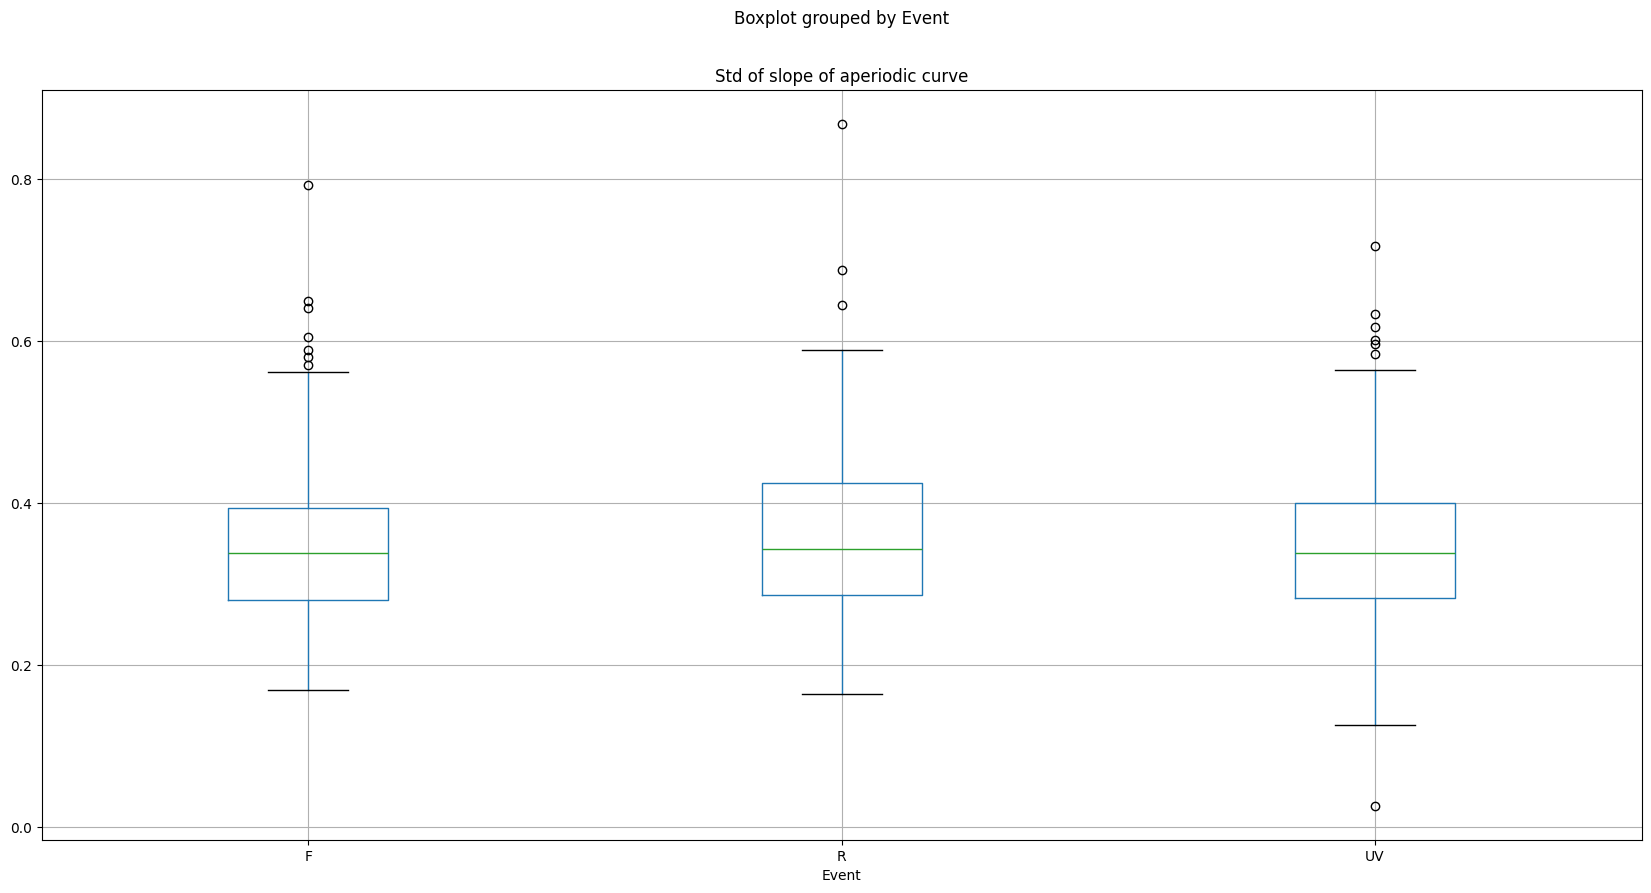

In [86]:
all_data_as_df.boxplot(column=['Std of slope of aperiodic curve'], by='Event', figsize=(20,10))
plt.show()

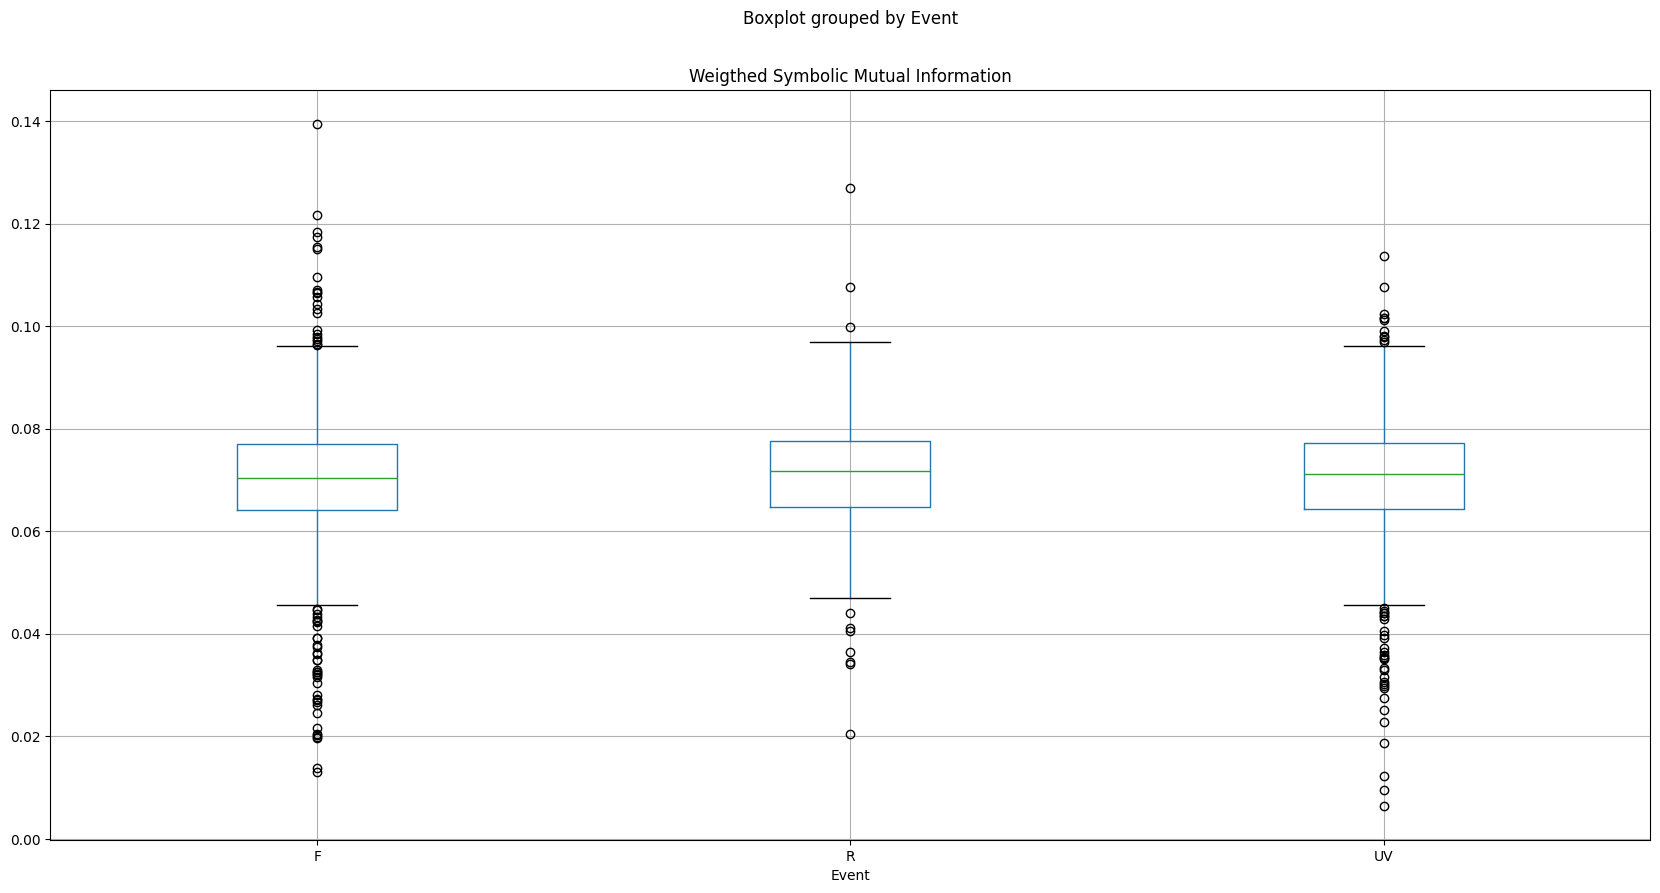

In [87]:
all_data_as_df.boxplot(column=['Weigthed Symbolic Mutual Information'], by='Event', figsize=(20,10))
plt.show()

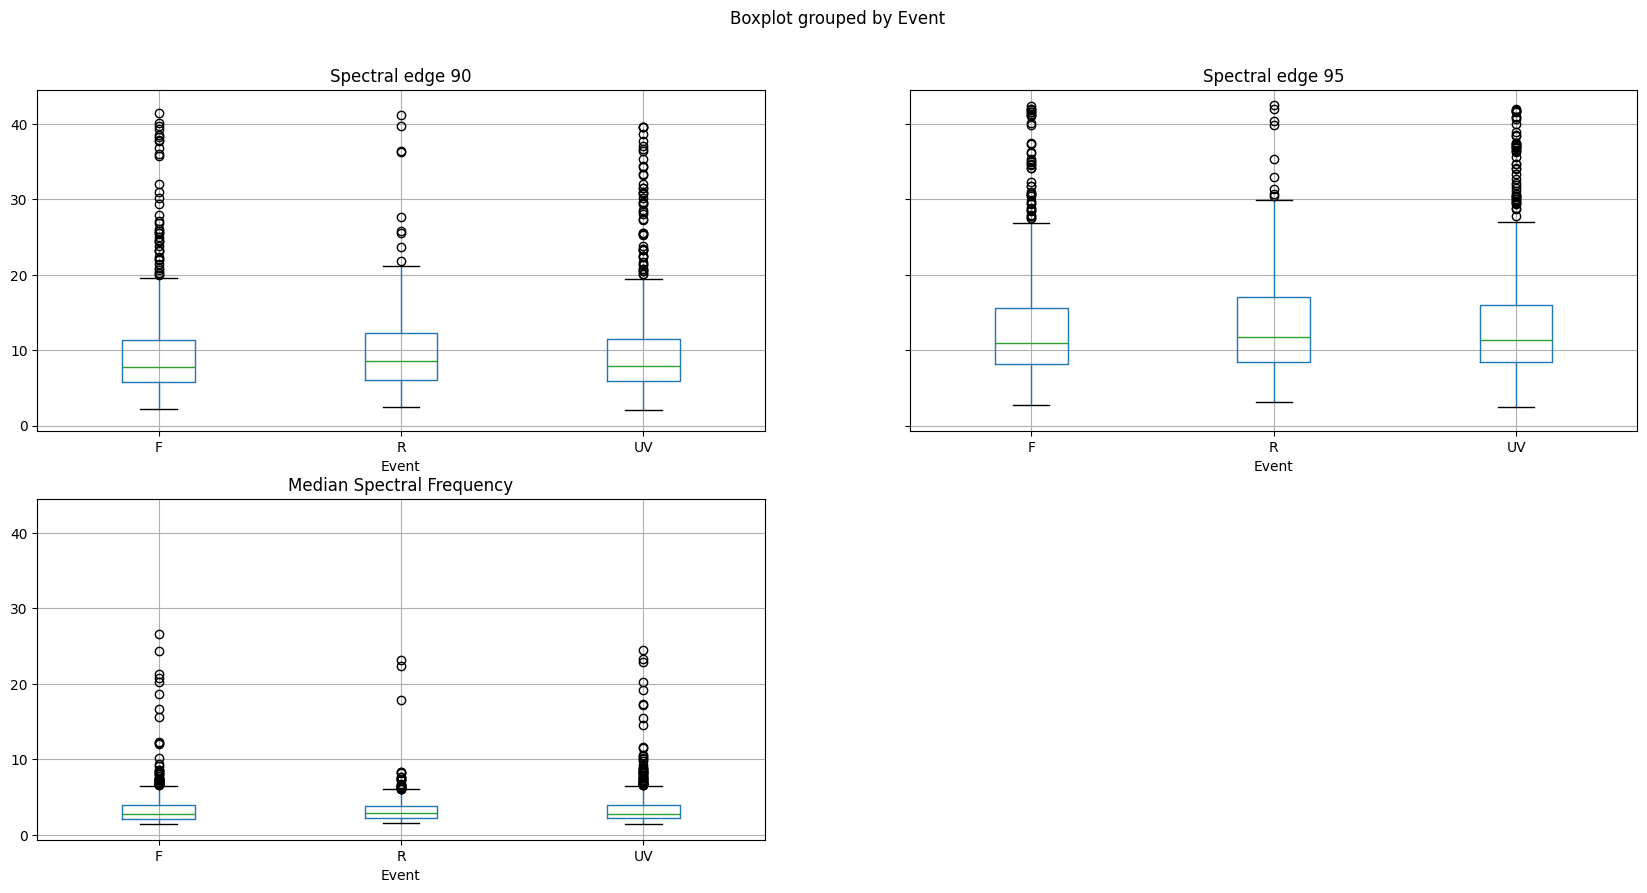

In [88]:
all_data_as_df.boxplot(column=['Spectral edge 90', 'Spectral edge 95', 'Median Spectral Frequency'], by='Event', figsize=(20,10), sharex=False)
plt.show()

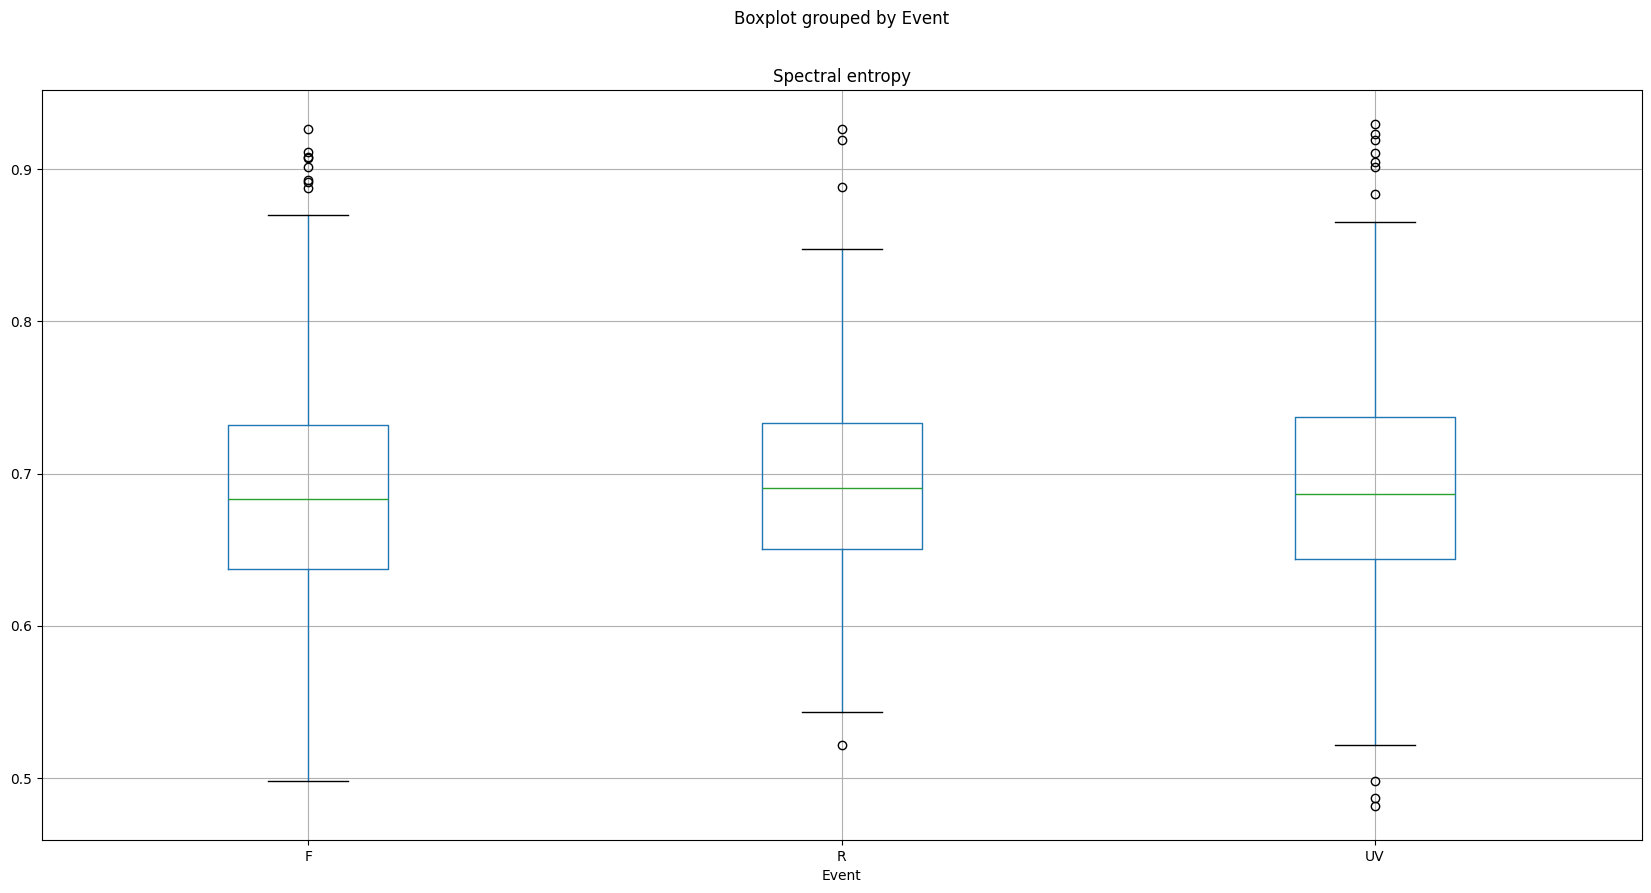

In [89]:
all_data_as_df.boxplot(column=['Spectral entropy'], by='Event', figsize=(20,10))
plt.show()